<a href="https://colab.research.google.com/github/larregui/IST718-Project/blob/main/modeling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt #2D plotting
import seaborn as sns #seaborn for plotting
from sklearn.linear_model import LinearRegression #not used
import os
import sys
import scipy.stats as stats
#plotly graphing
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
#For Spatial heatmaps
import folium
from folium import Choropleth
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
ufo = pd.read_csv("/content/ufo_wea_airport_movie_drug.csv")

In [ ]:
import locale
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')
ufo.shape

# ufo= ufo.drop(columns=['Unnamed: 0'])

ufo.head()
ufo.columns


Index(['city', 'state', 'shape', 'year', 'month', 'day', 'season', 'Credible',
       'military_base_dist', 'airport_dist', 'temp', 'rain', 'vis', 'thunder',
       'fog', 'tornado', 'snow', 'movies_released', '2015PrescriptionRate',
       '2015AlcoholPercentage', '2010pop'],
      dtype='object')

In [ ]:
# ufo.dtypes
# float(ufo['2010pop'].replace(',',''))

# ufo['2010pop'] = pd.to_numeric(ufo['2010pop'])
# ufo.iloc[:20].str.replace(',', '').astype(float)
# ufo.applymap(atof)

ufo['2010pop'] = ufo['2010pop'].str.replace(',', '').astype(float)
ufo.dtypes

city                       int64
state                      int64
shape                      int64
year                       int64
month                      int64
day                        int64
season                     int64
Credible                   int64
military_base_dist       float64
airport_dist             float64
temp                     float64
rain                       int64
vis                      float64
thunder                    int64
fog                        int64
tornado                    int64
snow                       int64
movies_released            int64
2015PrescriptionRate     float64
2015AlcoholPercentage    float64
2010pop                  float64
dtype: object

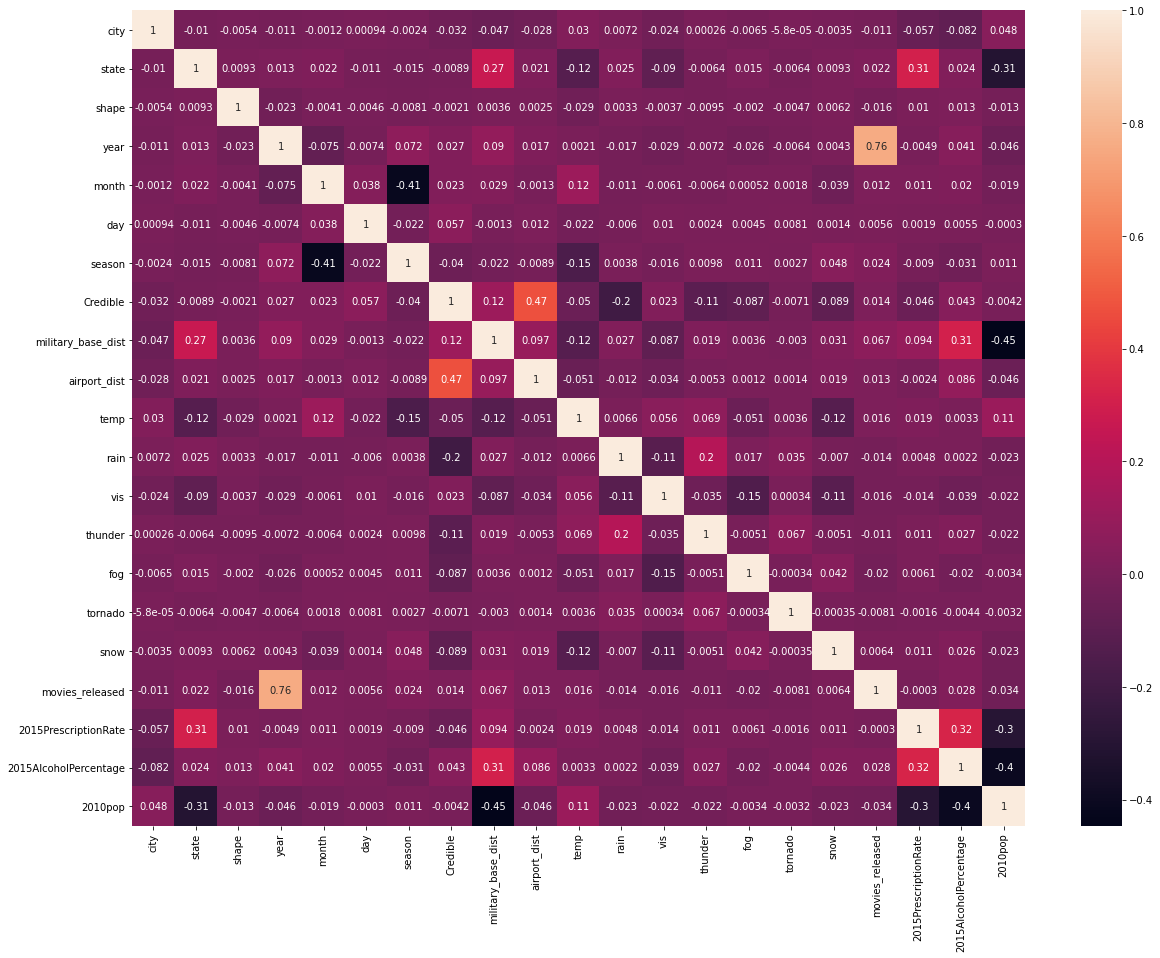

In [ ]:
# new_data.corr()
plt.subplots(figsize=(20,15))

sns.heatmap(ufo.corr(),annot=True)

plt.show()

In [ ]:
data= ufo.dropna()

target = data['Credible']

x_df = data.drop('Credible',axis=1)

feature_names = x_df.columns

x_df.describe()

# for col in data.columns:
#     pct_missing = np.mean(data[col].isnull())
#     print("Are there any null values?\n",'{} - {}%'.format(col, round(pct_missing*100)))

data.dtypes

city                       int64
state                      int64
shape                      int64
year                       int64
month                      int64
day                        int64
season                     int64
Credible                   int64
military_base_dist       float64
airport_dist             float64
temp                     float64
rain                       int64
vis                      float64
thunder                    int64
fog                        int64
tornado                    int64
snow                       int64
movies_released            int64
2015PrescriptionRate     float64
2015AlcoholPercentage    float64
2010pop                  float64
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_df, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.894
k: 3, Train/Test Score: 0.939/0.895
k: 5, Train/Test Score: 0.914/0.884
k: 7, Train/Test Score: 0.898/0.874
k: 9, Train/Test Score: 0.884/0.863
k: 11, Train/Test Score: 0.874/0.853
k: 13, Train/Test Score: 0.867/0.847
k: 15, Train/Test Score: 0.859/0.841
k: 17, Train/Test Score: 0.848/0.834
k: 19, Train/Test Score: 0.840/0.830
k: 21, Train/Test Score: 0.835/0.826
k: 23, Train/Test Score: 0.829/0.822
k: 25, Train/Test Score: 0.825/0.817
k: 27, Train/Test Score: 0.821/0.812
k: 29, Train/Test Score: 0.817/0.809
k: 31, Train/Test Score: 0.809/0.804
k: 33, Train/Test Score: 0.806/0.802
k: 35, Train/Test Score: 0.801/0.796
k: 37, Train/Test Score: 0.799/0.798
k: 39, Train/Test Score: 0.796/0.796


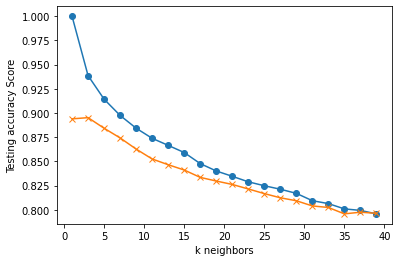

In [ ]:
#KNN ######################################################################################3


# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    

plt.plot(range(1, 40, 2), train_scores, marker='o')
plt.plot(range(1, 40, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [ ]:
# Neural Net with Keras sequential model ###############################


# Assign X (data) and y (target)
X = x_df
y = target #'Credible'
print(X.shape, y.shape)



(35126, 20) (35126,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [ ]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [ ]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [ ]:

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=20))  #there are 20 features used to solve for credibility
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               2100      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 12,402
Trainable params: 12,402
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
824/824 - 1s - loss: 0.3817 - accuracy: 0.8338
Epoch 2/60
824/824 - 1s - loss: 0.1874 - accuracy: 0.9451
Epoch 3/60
824/824 - 1s - loss: 0.1282 - accuracy: 0.9563
Epoch 4/60
824/824 - 1s - loss: 0.1027 - accuracy: 0.9592
Epoch 5/60
824/824 - 1s - loss: 0.0868 - accuracy: 0.9653
Epoch 6/60
824/824 - 1s - loss: 0.0828 - accuracy: 0.9644
Epoch 7/60
824/824 - 1s - loss: 0.0756 - accuracy: 0.9680
Epoch 8/60
824/824 - 1s - loss: 0.0715 - accuracy: 0.9692
Epoch 9/60
824/824 - 1s - loss: 0.0738 - accuracy: 0.9674
Epoch 10/60
824/824 - 1s - loss: 0.0594 - accuracy: 0.9741
Epoch 11/60
824/824 - 1s - loss: 0.0673 - accuracy: 0.9708
Epoch 12/60
824/824 - 1s - loss: 0.0592 - accuracy: 0.9743
Epoch 13/60
824/824 - 1s - loss: 0.0562 - accuracy: 0.9752
Epoch 14/60
824/824 - 1s - loss: 0.0610 - accuracy: 0.9732
Epoch 15/60
824/824 - 1s - loss: 0.0513 - accuracy: 0.9767
Epoch 16/60
824/824 - 1s - loss: 0.0508 - accuracy: 0.9772
Epoch 17/60
824/824 - 1s - loss: 0.0516 - accuracy: 0.9778
Epoch 

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

275/275 - 0s - loss: 0.0111 - accuracy: 0.9967
Normal Neural Network - Loss: 0.011072270572185516, Accuracy: 0.9966977834701538


In [ ]:
# what is happening here?

encoded_predictions = model.predict_classes(X_test_scaled[:20])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:20])}")

Predicted classes: [0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1]
Actual Labels: [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]


In [ ]:
#attempting PCA #####################################################3
from sklearn.preprocessing import StandardScaler

x = data.drop(columns=['Credible']).values
# x = x_df
x = StandardScaler().fit_transform(x) # normalizing the features


In [ ]:
x.shape
# (35126, 20)
# check whether the normalized data has a mean of zero and a standard deviation of one
np.mean(x),np.std(x)
# (-4.2823520230146674e-17, 0.9999999999999998)

(-4.2823520230146674e-17, 0.9999999999999998)

In [ ]:
# convert the normalized features into a tabular format with the help of DataFrame.
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]



In [ ]:
normalized_data = pd.DataFrame(x,columns=feat_cols)
normalized_data.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19
35121,-0.653987,-0.946857,1.351443,1.185335,0.634342,-0.711098,-1.278375,0.346618,-0.733256,0.895566,-0.149807,0.064162,-0.07718,-0.063935,-0.005336,-0.065707,1.038496,-0.206281,-0.166641,-0.198895
35122,1.687385,-0.882862,1.127691,1.185335,0.634342,-0.711098,-1.278375,0.348404,0.720379,1.170275,-0.149807,0.064162,-0.07718,-0.063935,-0.005336,-0.065707,1.038496,0.403341,1.363208,-0.924283
35123,0.333874,1.164983,0.232683,1.185335,0.634342,-0.711098,-1.278375,0.280879,-0.446320,1.007485,-0.149807,0.064162,-0.07718,-0.063935,-0.005336,-0.065707,1.038496,-0.602783,0.051909,-0.489975
35124,-1.467104,-0.690877,-1.557334,1.185335,0.634342,-0.711098,-1.278375,-0.588277,-0.759671,0.559812,-0.149807,0.064162,-0.07718,-0.063935,-0.005336,-0.065707,1.038496,0.527248,0.270459,0.074887
35125,1.468197,1.356968,-1.557334,1.185335,0.634342,-0.711098,-1.278375,1.061888,-0.020623,0.763299,-0.149807,0.064162,-0.07718,-0.063935,-0.005336,-0.065707,1.038496,-0.553220,0.270459,-0.345816


Text(0, 0.5, 'cumulative explained variance')

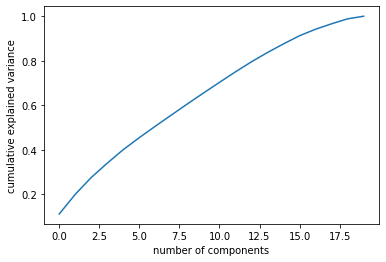

In [ ]:
# x = data.drop(columns=['Credible']).values

# x = StandardScaler().fit_transform(x) # normalizing the features

pca = PCA().fit(x)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#refer to this post https://stackoverflow.com/questions/53802098/how-to-choose-the-number-of-components-pca-scikitliear
# plot explained variance ratio and choose a number of components that "capture" at least 95% of the variance.
# In following example the number of components that capture around 95% of the variance is around 16.

In [120]:
# in the PCA method, you will pass the number of components (n_components=2) and finally call fit_transform 
# on the aggregate data. Here, several components represent the lower dimension in which you will project 
# your higher dimension data.


# from sklearn.decomposition import PCA
pca_ufo = PCA(n_components=16)
principalComponents_ufo = pca_ufo.fit_transform(x)

In [122]:
# create a DataFrame that will have the principal component values for all  samples

principal_ufo_Df = pd.DataFrame(data = principalComponents_ufo
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4',
                          'principal component 5', 'principal component 6',
                          'principal component 7', 'principal component 8',
                          'principal component 9', 'principal component 10',
                          'principal component 11', 'principal component 12',
                          'principal component 13', 'principal component 14',
                          'principal component 15', 'principal component 16'])

In [123]:
principal_ufo_Df.tail()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16
35121,-0.023671,-1.141657,-1.863646,0.070211,-0.098280,0.035457,-0.671715,-1.098574,1.242999,0.446852,0.085363,-0.436767,-0.778713,0.172880,0.241845,0.292524
35122,-1.166061,-0.850221,-2.055975,0.104183,0.056058,0.202148,-0.241668,-1.503561,0.057176,-0.086514,2.088733,1.100852,-0.329313,-0.255253,-0.384025,0.076377
35123,-0.749820,-0.990385,-1.809295,0.247259,-0.348481,-0.951761,0.211296,-0.713604,-0.137951,0.494546,0.062073,-0.301775,-0.214044,-0.110643,0.508602,0.711062
35124,-0.068460,-1.161221,-1.903457,-0.035334,0.239997,-0.019782,-1.589001,1.002263,-0.480836,0.653136,-0.510507,-1.164533,-0.138623,0.168814,-0.426151,-0.506302
35125,-1.156799,-1.034498,-1.736128,0.420082,-0.519493,-1.020434,0.745535,-0.035236,-2.081685,0.371500,0.518499,-0.130957,-0.350096,-0.189136,0.356025,0.617436


In [ ]:
# Once you have the principal components, you can find the explained_variance_ratio. 
# It will provide you with the amount of information or variance each principal component 
# holds after projecting the data to a lower dimensional subspace.

print('Explained variation per principal component: {}'.format(pca_ufo.explained_variance_ratio_))


# #principal component 1 holds 11.11% of the information while the principal component 2 holds 
# only 8.8% of the information. Also, the other point to note is that while projecting twenty-dimensional 
# data to a two-dimensional data, 81% information was lost.

Explained variation per principal component: [0.11117958 0.08838112]


In [105]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


# define dataset
target = data['Credible']

x_df = data.drop('Credible',axis=1)
Xx = x_df
yy = target 

# print(Xx)
# print(yy)
# # define the model
model = LogisticRegression()
# fit the model
model.fit(Xx, yy)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
# X_train, X_test, y_train, y_test = train_test_split(x_df, target, random_state=42)

predictions = model.predict(X_test)

# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print(score)

#################################################################################################
# logistic regression predicted with 65 percent accuracy

#################################################################################################

0.64711910726486


array([1, 1, 1, ..., 1, 1, 1])

Feature: 0, Score: -0.00005
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.00015
Feature: 8, Score: 0.00000
Feature: 9, Score: -0.00000
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.00000
Feature: 13, Score: -0.00000
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


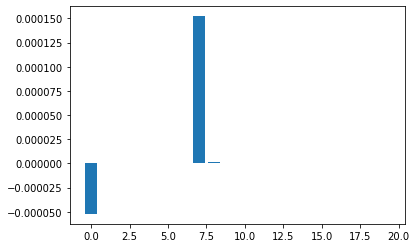

In [109]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.01507
Feature: 1, Score: 0.00352
Feature: 2, Score: 0.00265
Feature: 3, Score: 0.00409
Feature: 4, Score: 0.01384
Feature: 5, Score: 0.02874
Feature: 6, Score: 0.00599
Feature: 7, Score: 0.02017
Feature: 8, Score: 0.80354
Feature: 9, Score: 0.00857
Feature: 10, Score: 0.04484
Feature: 11, Score: 0.00719
Feature: 12, Score: 0.00852
Feature: 13, Score: 0.00629
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00869
Feature: 16, Score: 0.00418
Feature: 17, Score: 0.00384
Feature: 18, Score: 0.00641
Feature: 19, Score: 0.00387


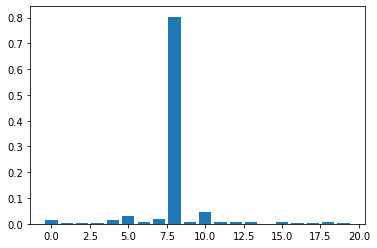

In [112]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset

# define the model
# model = RandomForestRegressor() #classifier is used for binary classification. regression used for continues
model = RandomForestClassifier()
# fit the model
model.fit(Xx, yy)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [113]:
# X_train, X_test, y_train, y_test = train_test_split(x_df, target, random_state=42)

predictions = model.predict(X_test)

# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print(score)

#################################################################################################
# random forest classification predicted with 100 percent accuracy

#################################################################################################

1.0


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.02819
Feature: 5, Score: 0.04358
Feature: 6, Score: 0.04986
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.67089
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.06411
Feature: 11, Score: 0.04363
Feature: 12, Score: 0.02993
Feature: 13, Score: 0.02879
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.03127
Feature: 16, Score: 0.00975
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000


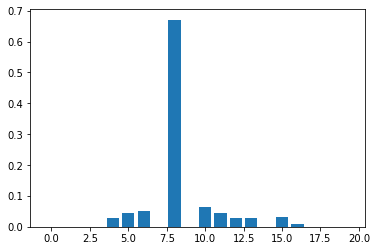

In [115]:
# XGBoost Classification
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier
# define dataset

# define the model
model = XGBClassifier()
# fit the model
model.fit(Xx, yy)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [116]:
# X_train, X_test, y_train, y_test = train_test_split(x_df, target, random_state=42)

predictions = model.predict(X_test)

# Use score method to get accuracy of model
score = model.score(X_test, y_test)
print(score)

#################################################################################################
# XGBoost Classification predicted with 100 percent accuracy

#################################################################################################

1.0
